[Index](Index.ipynb) - [Back](2015_08_27_03_Presentation_Lab_Cylinder.ipynb) - [Next](2015_08_27_03_Presentation_Lab_Brain.ipynb)

# CYLINDER PHANTOM acquired on Siemens Biograph mMR

In [1]:
import occiput
from occiput.Reconstruction.PET.PET_scanners import Biograph_mMR
from occiput.DataSources.FileSources import import_interfile_volume

In [2]:
pet = occiput.Reconstruction.PET.PET_Static_Scan()

In [3]:
pet.set_scanner(Biograph_mMR)

In [4]:
pet.use_compression(False)

LOAD MEASUREMENT DATA - 10 MINS

In [5]:
listmode = 0
if (listmode == 1):
    time_range_ms = [0, 14400000]
    pet.import_listmode('../../data/PET_data/scans/2014_12_03_cylinder/listmode/PET_ACQ_342_20141212155111-0.l.hdr', time_range_ms=time_range_ms)
    pet.export_prompts('../../data/PET_data/scans/2014_12_03_cylinder/prompts.h5')
    pet.export_randoms('../../data/PET_data/scans/2014_12_03_cylinder/randoms.h5')
else:
    pet.import_prompts('../../data/PET_data/scans/2014_12_03_cylinder/prompts.h5')
    pet.import_randoms('../../data/PET_data/scans/2014_12_03_cylinder/randoms.h5')

Uncompression done
Uncompression done


In [6]:
pet.use_compression(False)

In [7]:
# Import sensitivity
pet.import_sensitivity('../../data/PET_data/scans/2014_12_03_cylinder/norm/norm3d_00.h33')

In [20]:
# Import scatter
#pet.import_scatter('../../data/PET_data/scans/2014_12_03_cylinder/output/umap_00.h33')

In [24]:
# Import attenuation
#pet.import_attenuation('../../data/PET_data/scans/2014_12_03_cylinder/mumaps/cylinder_umap.v.hdr',
#                       '../../data/PET_data/scans/2014_12_03_cylinder/mumaps/hw_umap.v.hdr')

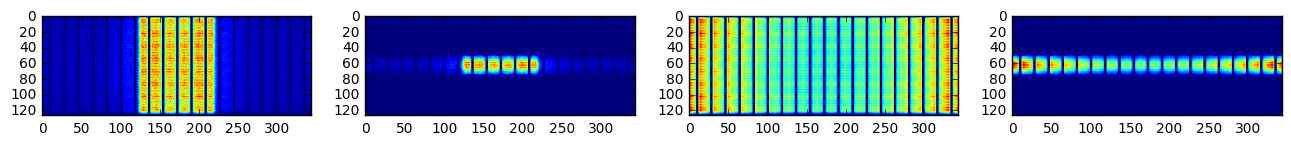

In [8]:
figure(figsize=[16,6])
subplot(1,4,1); imshow(pet.prompts.to_nd_array()[0,5,:,:].transpose())
subplot(1,4,2); imshow(pet.prompts.to_nd_array()[0,0,:,:].transpose())
subplot(1,4,3); imshow(pet.sensitivity.to_nd_array()[0,5,:,:].transpose())
subplot(1,4,4); imshow(pet.sensitivity.to_nd_array()[0,0,:,:].transpose())

In [9]:
#pet.set_activity_shape([128,128,128])
#pet.set_activity_size([128*pet.activity_size[0]/344.0,128*pet.activity_size[1]/344.0,128*pet.activity_size[2]/127.0])

ITERATIVE RECONSTRUCTION

In [10]:
activity_recon = pet.osem_reconstruction(iterations=20, attenuation=None, subset_mode="ordered_axial", subset_size=12)

0.0 / 100
Reconstructing
5.0 / 100
10.0 / 100
15.0 / 100
20.0 / 100
25.0 / 100
30.0 / 100
35.0 / 100
40.0 / 100
45.0 / 100
50.0 / 100
55.0 / 100
60.0 / 100
65.0 / 100
70.0 / 100
75.0 / 100
80.0 / 100
85.0 / 100
90.0 / 100
95.0 / 100
100.0 / 100
100.0 / 100


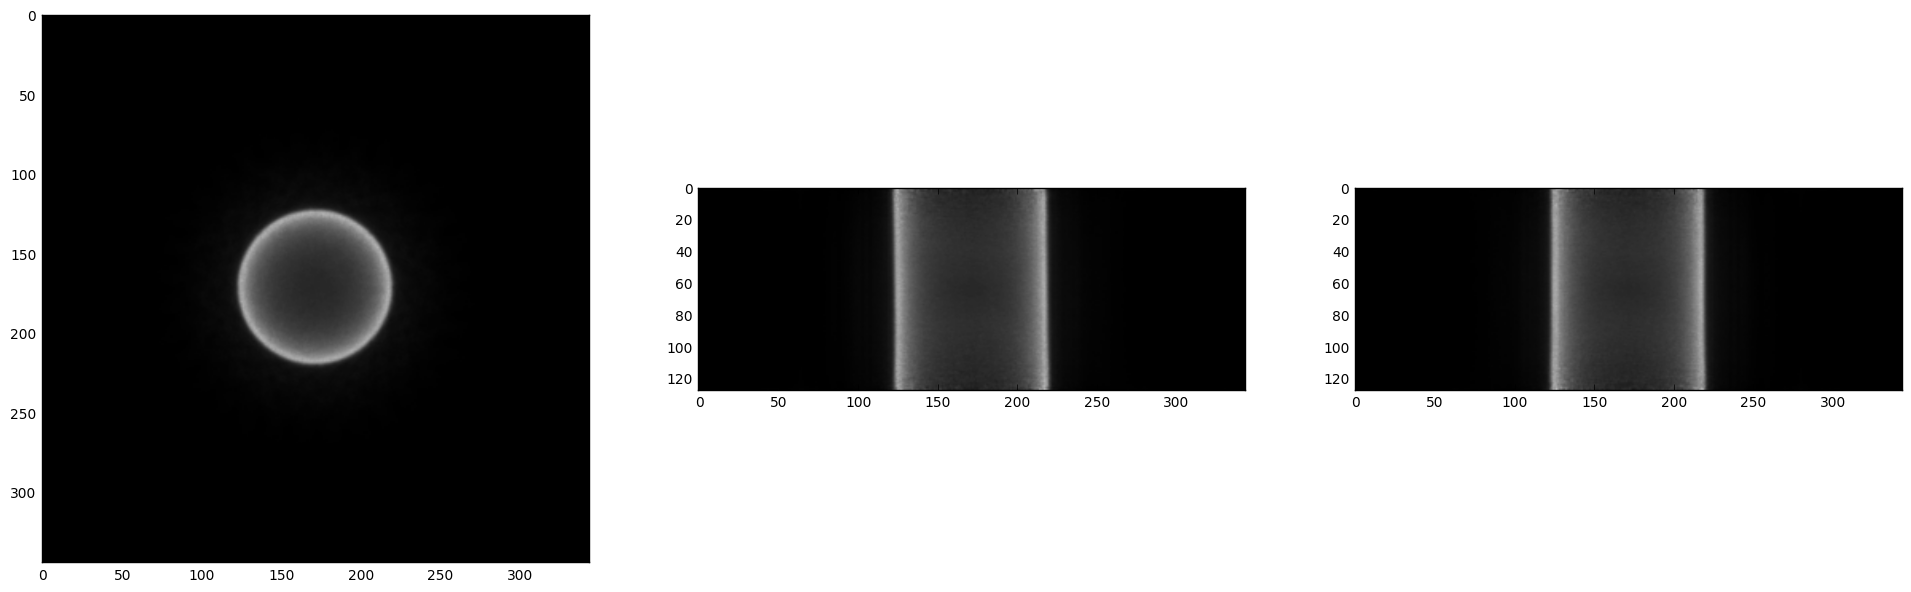

In [11]:
figure(figsize=[24,8])
subplot(1,3,1); imshow(activity_recon.data[:,:,64].transpose(), vmax = 0.4, cmap='gray')
subplot(1,3,2); imshow(activity_recon.data[:,178,:].transpose(),vmax = 0.4, cmap='gray')
subplot(1,3,3); imshow(activity_recon.data[178,:,:].transpose(),vmax = 0.4, cmap='gray')

In [12]:
#activity_recon.save_to_file('../../data/PET_data/scans/2015_05_20_derenzo/occiput/activity_recon.nii')

In [13]:
from occiput.DataSources.FileSources import import_interfile_volume
activity_recon_Siemens_no_corrections = import_interfile_volume('../../data/PET_data/scans/2014_12_03_cylinder/recon_no_att/recon__000_000.v.hdr')
activity_recon_Siemens_corrections = import_interfile_volume('../../data/PET_data/scans/2014_12_03_cylinder/recon_yes_att/recon__000_000.v.hdr')

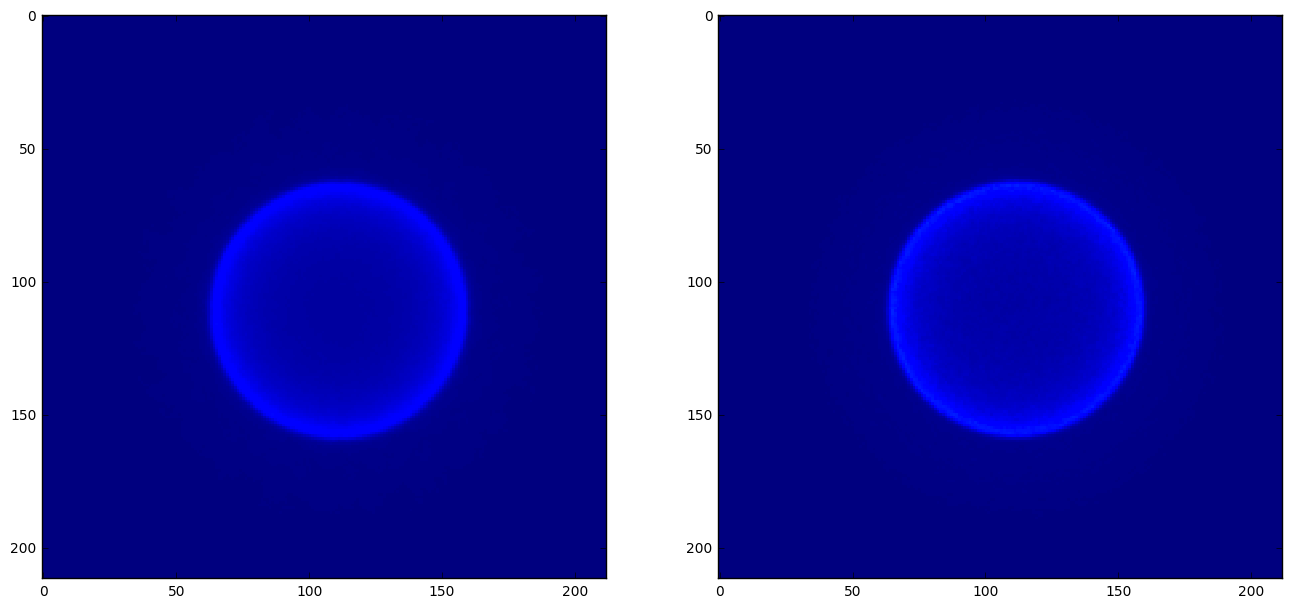

In [18]:
figure(figsize=[16,9])
subplot(1,2,1); imshow(activity_recon.data[60:272,60:272,64],vmax = 5/2.3, interpolation='nearest')
subplot(1,2,2); imshow(activity_recon_Siemens_no_corrections.data[60:272,60:272,64],vmax = 5, interpolation='nearest')

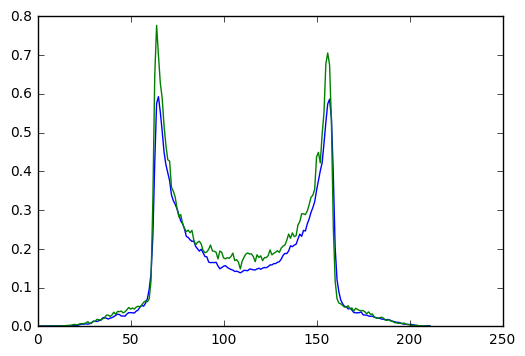

In [17]:
plot( activity_recon.data[60:272,172,64] * 2.3)
plot( activity_recon_Siemens_no_corrections.data[60:272,172,64] )

[Index](Index.ipynb) - [Back](2015_08_27_03_Presentation_Lab_Cylinder.ipynb) - [Next](2015_08_27_03_Presentation_Lab_Brain.ipynb)